# Proyecto para la predicción de riesgo cardiovascular
    Molins Méndez, Guillermo y Tena Agudo, José Justo


# Definición del Problema

El objetivo de este trabajo consiste en poder realizar una predicción relativamente acertada acerca del estado de salud de los pacientes y del riesgo que corren de contraer enfermedades cardiovasculares. La idea es que se pueda hacer esta evaluación de forma autónoma y mediante preguntas sencillas. El resultado del modelo creado servirá como antecedente para la revisión con un especialista. Creemos que una vista preliminar puede ayudar a prevenir riesgos sin el esfuerzo que supone someterse a pruebas más específicas. Esto es relevante ya que puede contribuir positivamente a reducir el coste en medios humanos (horas de consulta) y materiales (análisis de sangre).

En este proyecto nos centraremos en la predicción del riesgo cardiovascular. Para ello, utilizaremos el dataset **_"Cardiovascular Diseases Risk Prediction Dataset"_** que se puede encontrar en Kaggle en el siguiente [enlace](https://www.kaggle.com/datasets/alphiree/cardiovascular-diseases-risk-prediction-dataset/data). Hemos decidido utilizar este set de datos ya que posee un buen equilibrio entre variables numéricas y categóricas. Además, las variables del dataset presentan distribuciones normales y no poseen valores nulos/faltantes lo que facilitará su tratamiento.

# Carga y Exploración de Datos

El primer paso de este trabajo será realizar la ingesta del dataset, para ello se descargará a través de un enlace de google drive, finalmente mediante la librería Pandas se cargará toda su información en una estructura de tipo dataframe.

In [ ]:
# Se descarga el conjunto de datos
!wget "https://drive.google.com/uc?export=download&id=1-CzE5KlM5PD_ur2yhmSgQmP5URj-RQ5M" -O 'dataset.csv'

# Se construye un dataframe a partir del dataset descargado
import pandas as pd
data = pd.read_csv('dataset.csv')

--2024-03-18 18:31:53--  https://drive.google.com/uc?export=download&id=1-CzE5KlM5PD_ur2yhmSgQmP5URj-RQ5M
Resolving drive.google.com (drive.google.com)... 74.125.132.102, 74.125.132.101, 74.125.132.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.132.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1-CzE5KlM5PD_ur2yhmSgQmP5URj-RQ5M&export=download [following]
--2024-03-18 18:31:53--  https://drive.usercontent.google.com/download?id=1-CzE5KlM5PD_ur2yhmSgQmP5URj-RQ5M&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.193.132, 2607:f8b0:4001:c11::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.193.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32453765 (31M) [application/octet-stream]
Saving to: ‘dataset.csv’

dataset.csv         100%[===================>]  30.95M  34.5MB/s 

El análisis exploratorio de datos se apoyará en el módulo EDAModule desarrollado por nosotros, del cual importaremos la clase ExploratoryDataAnalysis con todas las funcionalidades necesarias para llevar a cabo el estudio de la estructura y distribución de la información.

In [ ]:
# Se importa el módulo con todas las funciones auxiliares
!rm -r ExploratoryDataAnalysis/

!git clone https://github.com/jj-tena/ExploratoryDataAnalysis.git

!mv ExploratoryDataAnalysis/EDAModule.py ExploratoryDataAnalysis/../EDAModule.py

!rm -r ExploratoryDataAnalysis/

from EDAModule import ExploratoryDataAnalysis

# Se inicializa el módulo mediante el dataframe
eda = ExploratoryDataAnalysis(dataset=data)

rm: cannot remove 'ExploratoryDataAnalysis/': No such file or directory
Cloning into 'ExploratoryDataAnalysis'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 16 (delta 1), reused 12 (delta 0), pack-reused 0
Receiving objects: 100% (16/16), 4.29 KiB | 4.29 MiB/s, done.
Resolving deltas: 100% (1/1), done.


El análisis exploratorio de datos tiene como objetivo obtener un mayor conocimiento sobre el dataset con el que se va a trabajar, con este propósito se estudiarán los siguientes puntos:

* Dimensiones
* Variables
* Tipos
* Estadísticas
* Valores nulos
* Outliers
* Valores únicos
* Histogramas
* Matriz de correlación
* Gráficos de dispersión

**Dimensiones:**

En primer lugar se observarán las dimensiones y el tamaño del conjunto de datos. En este caso se trata de un dataset con 19 variables y 308854 casos de estudio, lo cual da como resultado un total de 5868226 datos.
Además se expondrá una muestra de las 5 primeras filas del conjunto de datos.

In [ ]:
# Se ejecuta la función getShape para obtener las dimensiones del dataframe
print("1. Shape: ", eda.getShape())

# Se ejecuta la función getSize para obtener el tamaño del dataframe
print("\n2. Size:", eda.getSize())

# Se ejecuta la función getHead para obtener una muestra del dataframe
print("\n3. Head:")
eda.getHead()

1. Shape:  (308854, 19)

2. Size: 5868226

3. Head:


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


**Variables:**

El siguiente paso será explicar el significado de cada una de las variables que integran el dataset:

* General_Health: indica el estado de salud general, sus posibles valores son [Muy buena, Buena, Excelente, Media, Baja].

* Checkup: indica cuando fue la última vez que visitó el médico, sus posibles valores son: [En el último año, En los últimos dos años, En los últimos 5 años, 5 or more years ago, Never].          

* Exercise: indica si hace o no ejercicio físico.

* Heart_Disease: indica si sufre/ha sufrido o no una enfermedad cardíaca.

* Skin_Cancer: indica si sufre/ha sufrido o no cáncer de piel.

* Other_Cancer: indica si sufre/ha sufrido o no cualquier otro tipo de cáncer.

* Depression: indica si sufre/ha sufrido o no depresión.

* Diabetes: indica si sufre/ha sufrido diabetes, sus posibles valores son: [No, Yes, No, pre-diabetes or borderline diabetes, Yes, but female told only during pregnancy].

* Arthritis: indica si sufre/ha sufrido o no artritis.

* Sex: indica si su género es hombre o mujer.

* Age_Category: indica su franja de edad, medida en rangos de 5 años desde los 25 hasta los 69

* Height_(cm): indica su altura expresada en centímetros.

* Weight_(kg): indica su peso expresado en kilogramos.

* BMI: indica su índice de masa corporal.

* Smoking_History: indica si fuma/ha fumado o no.

* Alcohol_Consumption: indica su cantidad de consumo de alcohol.

* Fruit_Consumption: indica su cantidad de consumo de fruta.

* Green_Vegetables_Consumption: indica su cantidad de consumo de verdura.

* FriedPotato_Consumption: indica su cantidad de consumo de patatas fritas.

In [ ]:
# Se ejecuta la función getColumns para obtener el listado de columnas del dataframe
print("4. Columns:", eda.getColumns())

4. Columns: Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')


**Tipos:**

Una vez explicadas las distintas variables se señalará el tipo de datos que contienen.

El presente dataset contiene tanto columnas categóricas de tipo object:

* General_Health
* Checkup
* Exercise
* Heart_Disease
* Skin_Cancer
* Other_Cancer
* Depression
* Diabetes
* Arthritis
* Sex
* Age_Category
* Smoking_History

Como numéricas de tipo float64:

* Height_(cm)
* Weight_(kg)
* BMI
* Alcohol_Consumption
* Fruit_Consumption
* Green_Vegetables_Consumption

In [ ]:
# Se ejecuta la función getTypes para obtener el tipo de cada variable del dataframe
print("5. Data Types:")
eda.getTypes()

5. Data Types:


General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object

**Estadísticas:**

En este punto se evindenciarán una serie de estadísticas generales para cada una de las variables, en concreto las siguientes características:

* count: número de valores no nulos
* mean: media de los valores
* std: desviación estándar
* min: valor mínimo
* 25%: percentil 25
* 50%: percentil 50
* 75%: percentil 75
* max: valor máximo

En base a las estadísticas mostradas se pueden apreciar características como Height_(cm), Weight_(kg) y BMI: todas presentan valores mínimos y máximos muy extremos, siendo posiblemente debido a la presencia de transtornos y condiciones como enanismo o anorexia para los mínimos, así como gigantismo u obesidad morbida para los máximos.

Por último destaca como todas las columnas relacionadas con el consumo de alimentos tienen como valor mínimo cero, reflejando una gran variedad de pacientes en cuanto a su cuidado alimenticio.

In [ ]:
# Se ejecuta la función getStatistics para obtener datos estadísticas de todas las columnas del dataframe
print("6. Summary Statistics for Numerical Columns:")
eda.getStatistics()

6. Summary Statistics for Numerical Columns:


,Height_(cm),Weight_(kg),BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
count,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000,308854.000000
mean,170.615249,83.588655,28.626211,5.096366,29.835200,15.110441,6.296616
std,10.658026,21.343210,6.522323,8.199763,24.875735,14.926238,8.582954
min,91.000000,24.950000,12.020000,0.000000,0.000000,0.000000,0.000000
25%,163.000000,68.040000,24.210000,0.000000,12.000000,4.000000,2.000000
50%,170.000000,81.650000,27.440000,1.000000,30.000000,12.000000,4.000000
75%,178.000000,95.250000,31.850000,6.000000,30.000000,20.000000,8.000000
max,241.000000,293.020000,99.330000,30.000000,120.000000,128.000000,128.000000


Nulos:

A continuación se indicará el número de valores nulos que presenta cada variable.

Como se puede contemplar este dataset no presenta valores nulos en ninguna de sus columnas.

In [ ]:
# Se ejecuta la función getNulls para obtener el número de valores nulos de cada columna del dataframe
print("7. Checking for Missing Values:")
eda.getNulls()

7. Checking for Missing Values:


General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_(cm)                     0
Weight_(kg)                     0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
dtype: int64

**Outliers**

Los outliers son valores extremos de una variable numérica del dataset, normalmente se encuentran alejados del percentil 25 y del percentil 75, por tanto al visualizar las columnas mediante gráficas boxplot se podrán localizar en los extremos de la imagen.

Para advertir la presencia de outliers se generará una gráfica boxplot de cada variable.

Exceptuando la variable de Height_(cm) que debido a factores biológicos presenta una distribución equilibrada, el resto de variables numéricas atienden mayoritariamente a decisiones propias del individuo como el peso acumulado o los hábitos alimenticios, en todos estos casos encontramos un gran flujo de valores que van desde el percentil 75 hacia el valor máximo, pero debido a la continuidad de estos valores no considero que sean outliers por no encontrarse aislados.

8. Boxplot visualization


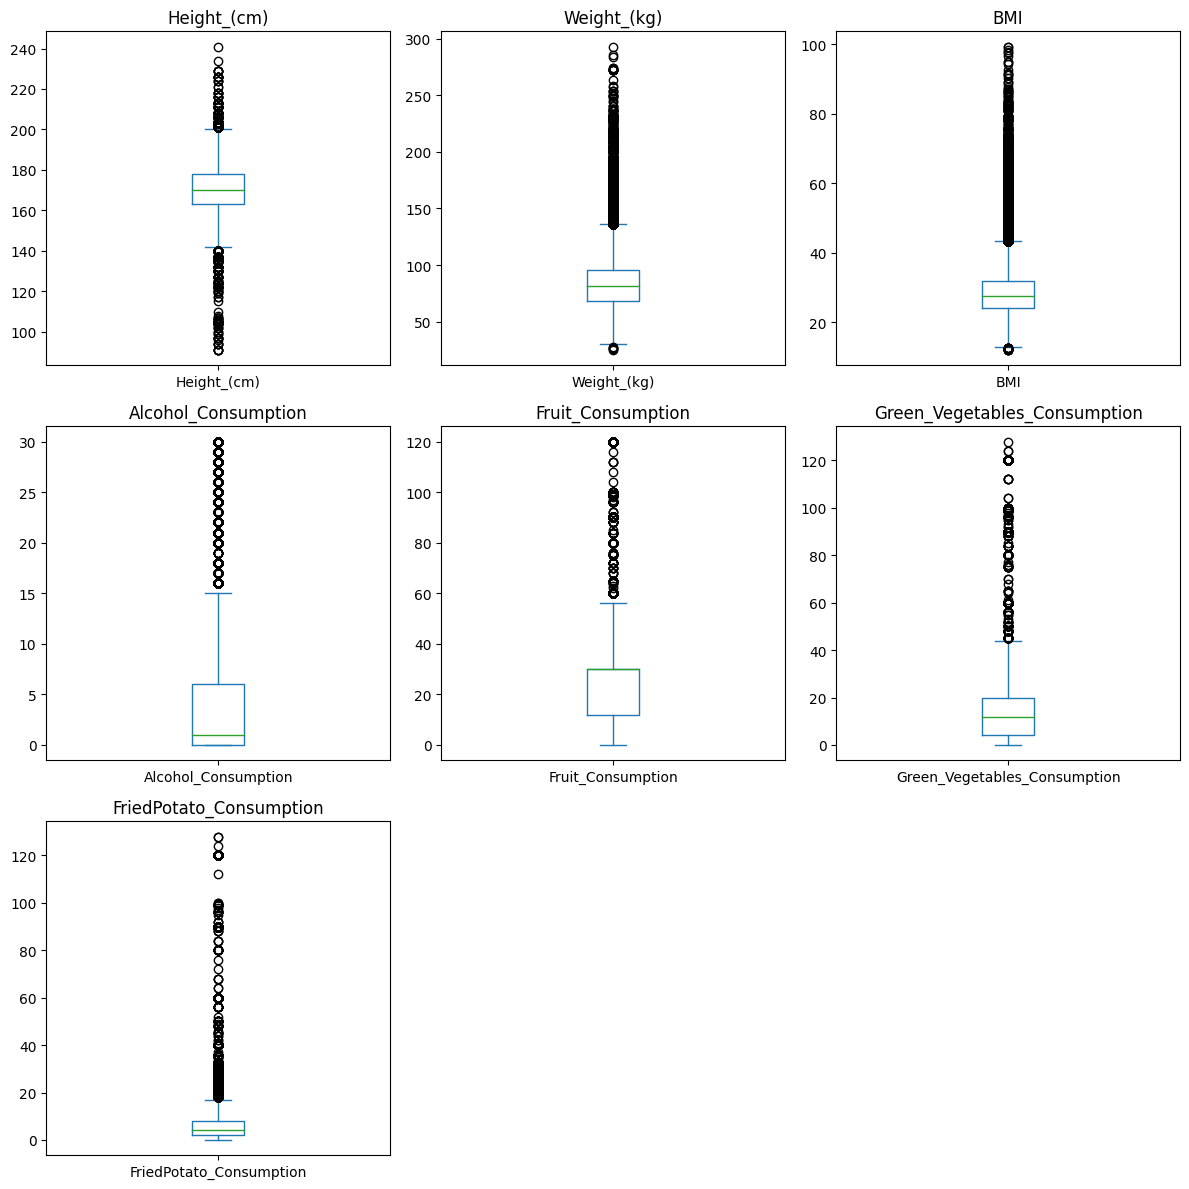

In [ ]:
# Se ejecuta la función getBoxplots para mostrar un gráfico boxplot de cada variable del dataframe
print("8. Boxplot visualization")
eda.getBoxplots()

**Únicos**

Los valores únicos son todos los posibles valores distintos que aparecen en una variable. Este punto nos permite reafirmar los valores de las columnas categóricas presentados en el punto de Variables.

In [ ]:
# Se ejecuta la función getUniques para mostrar los valores únicos de cada variable del dataframe
print("9. List of Unique Values:")
print(eda.getUniques())

# Se ejecuta la función countUniques para mostrar el número de valores únicos de cada variable del dataframe
print("\n10. Count of Unique Values:", eda.countUniques())

9. List of Unique Values:
General_Health                     5
Checkup                            5
Exercise                           2
Heart_Disease                      2
Skin_Cancer                        2
Other_Cancer                       2
Depression                         2
Diabetes                           4
Arthritis                          2
Sex                                2
Age_Category                      13
Height_(cm)                       99
Weight_(kg)                      525
BMI                             3654
Smoking_History                    2
Alcohol_Consumption               31
Fruit_Consumption                 77
Green_Vegetables_Consumption      75
FriedPotato_Consumption           69
dtype: int64

10. Count of Unique Values: 
Columna: General_Health
Very Good    110395
Good          95364
Excellent     55954
Fair          35810
Poor          11331
Name: General_Health, dtype: int64

Columna: Checkup
Within the past year       239371
Within the past 2

**Histogramas:**

Los histogramas permiten observar el peso, es decir, el número de apariciones, que toma cada rango de valores dentro del conjunto, para ello representa a cada rango mediante una columna. En el caso de las columnas categóricas simplemente se utilizarán gráficos de barras para representar la distribución de sus valores.

Se generarán histogramas con 10 bins para todas las variables númericas, observando la distribución de los valores en los distintos histogramas se pueden extraer una serie de conclusiones:
* Height_(cm), Weight_(kg) y BMI: siguen una distribución de mayor similitud con la normal, teniendo la mayor parte de sus datos entorno a un valor central y decreciendo a medida que nos alejamos de él. Sin embargo se diferencian en que tras el valor central, la altura tiene un mayor número de casos por debajo que por encima de el mismo, mientras que peso e imc sucede lo contrario.
* Alcohol_Consumption, Fruit_Consumption, Green_Vegetables_Consumption y FriedPotato_Consumption: el consumo de alcohol, verdura y patatas fritas tiene su valor más frecuente en no ingerir absolutamente nada de estos alimentos, a diferencia del caso de la fruta en el que la mayoría de gente si come fruta ocasionalmente. Por otra parte en el consumo de fruta, verdura y patatas fritas a medida que aumenta el consumo decrece el número de ocurrencias, este aspecto difiere del consumo de alcohol, en el cual vuelve a aumentar al aproximarse a valores máximos, posiblemente debido a problemas de adicción al alcohol.

Respecto a los gráficos de barras para columnas categóricas se puede apreciar:
* En cuanto a las enfermedades, Heart_Disease, Skin_Cancer y Other_Cancer presentan un fuerte desbalance, siendo lógico al ser enfermedades muy minoritarias en la población y mayormente debidas a factores biológicos. Seguidamente Diabetes y Depression presentan un menor desbalance, siendo enfermedades cada vez con mayor ratio de aparición debido al estilo de vida. Finalmente la Arthritis es la enfermedad con mayor aparición, debido a que aparece con grandísima frecuencia en la población de edad más avanzada.
* El resto de las variables sigue una distribución de valores que cabría esperar, exceptuando la cercana paridad entre pacientes que han fumado y aquellos que nunca lo han hecho.

11. Histogram visualization with 10 bins


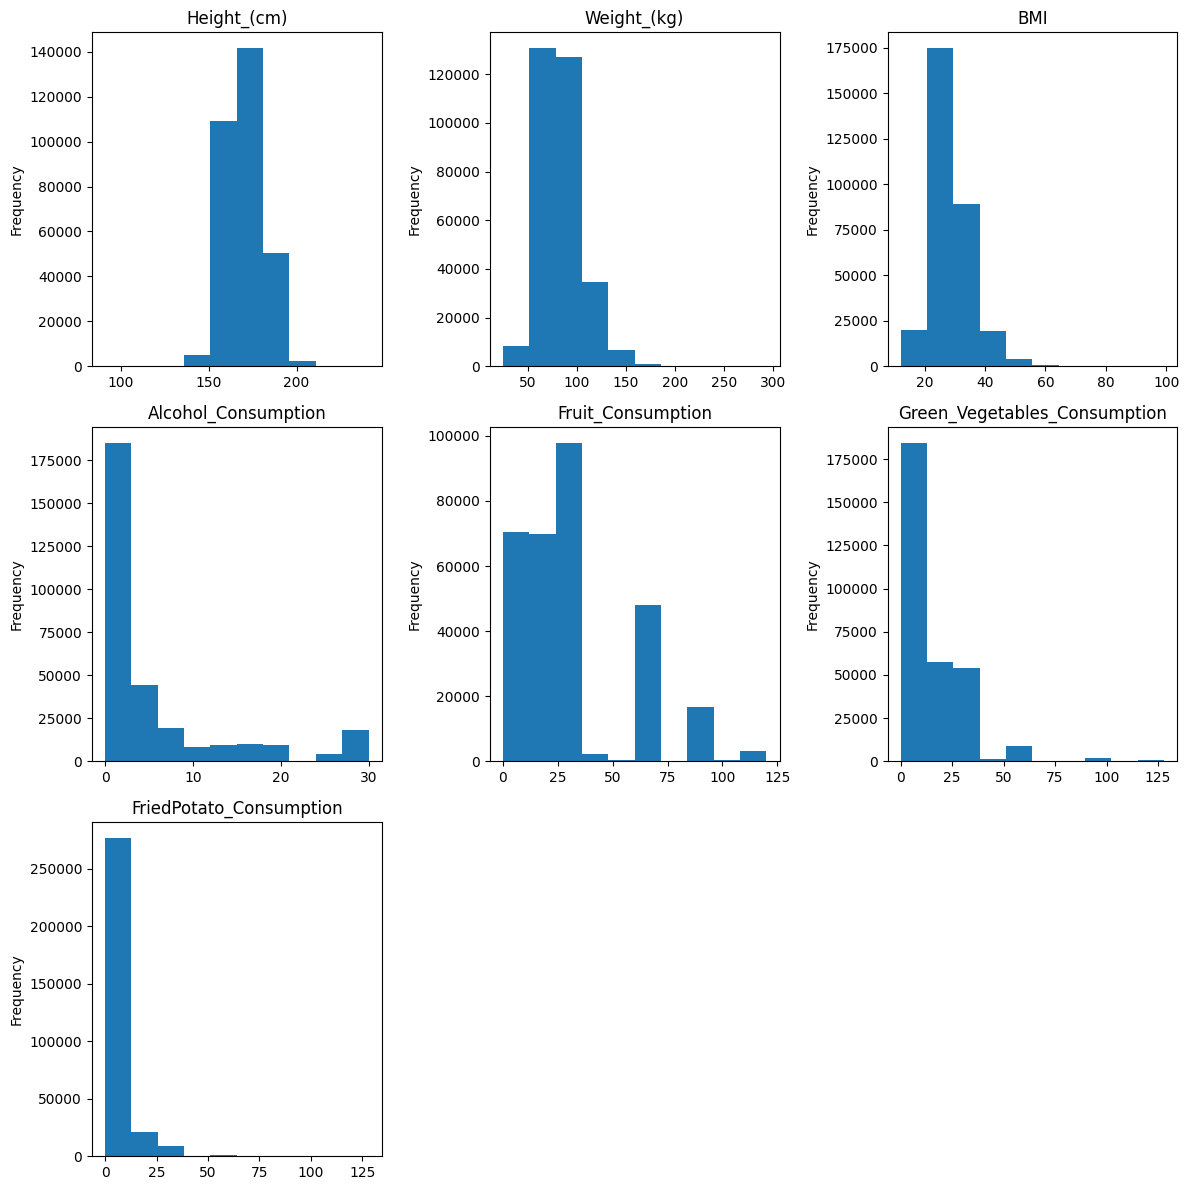

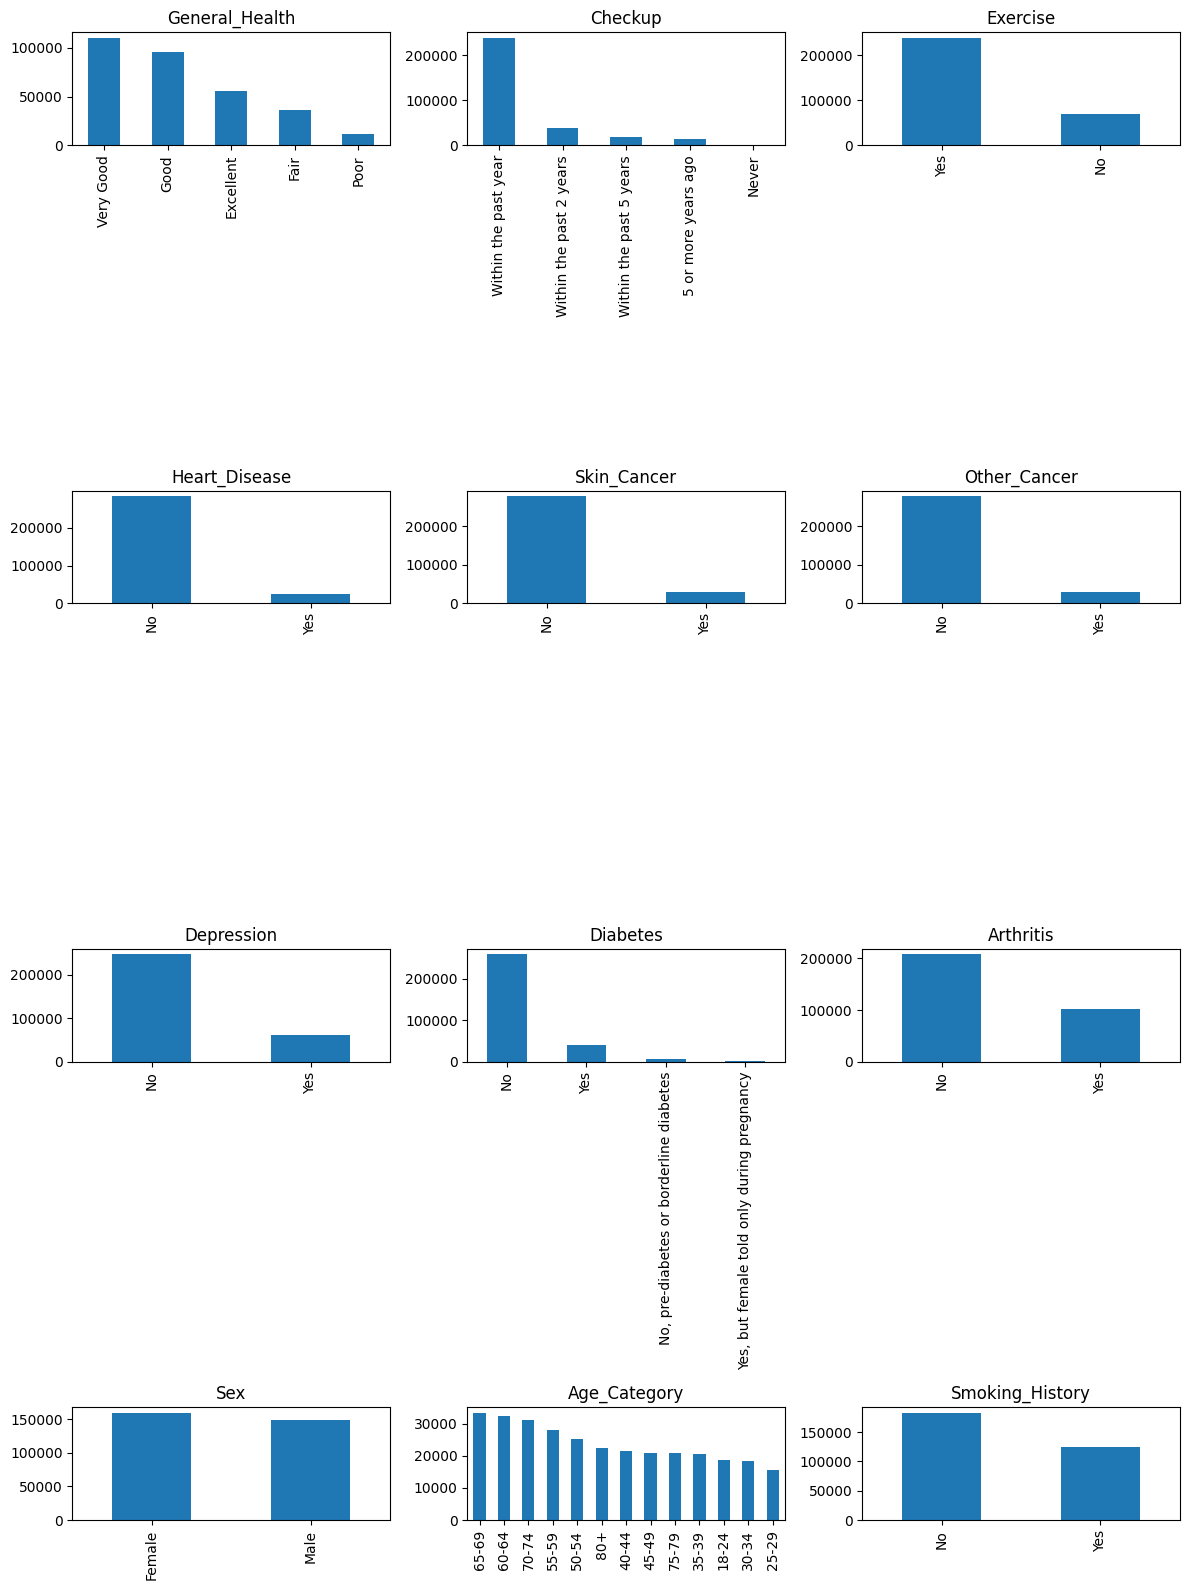

In [ ]:
# Se ejecuta la función getHistograms para mostrar un histograma de 10 bins para cada variable numérica del dataframe
print("11. Histogram visualization with 10 bins")
eda.getHistograms()

# Se ejecuta la función plot_bar_charts_categorical_columns para mostrar un gráfico de barras de cada variable categórica del dataframe
eda.plot_bar_charts_categorical_columns()

**Matriz de correlación**

La matriz de correlación permite observar el grado de relación que se da entre las distintas variables, es decir, como de influyente resulta el valor de una para otra. Mediante la tabla generada, será posible ver qué variables pueden resultar más importantes a la hora de predecir otras.

Aunque en general la mayoría de variables no tienen mucha relación entre sí, se pueden encontrar algunos pares de variables con indicios de relación, a continuación se explorarán todos aquellos que han obtenido una puntuación superior a 0.25:

* Height_(cm) y Weight_(kg): aquí se da una relación lógica dado que a mayor altura hay una mayor masa y por tanto mayor peso.
* BMI y Weight_(kg): en este caso la relación también es obvia siendo el peso uno de los factores que entran en juego en la fórmula del IMC.
* Fruit_Consumption y Green_Vegetables_Consumption: este caso encuentra su explicación en que normalmente la gente que sigue una dieta lo suficientemente sana como para incluir verdura o fruta de manera habitual, tiende a incluir ambas.

12. Correlation Matrix:


/content/EDAModule.py:172: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = self.dataset.corr()


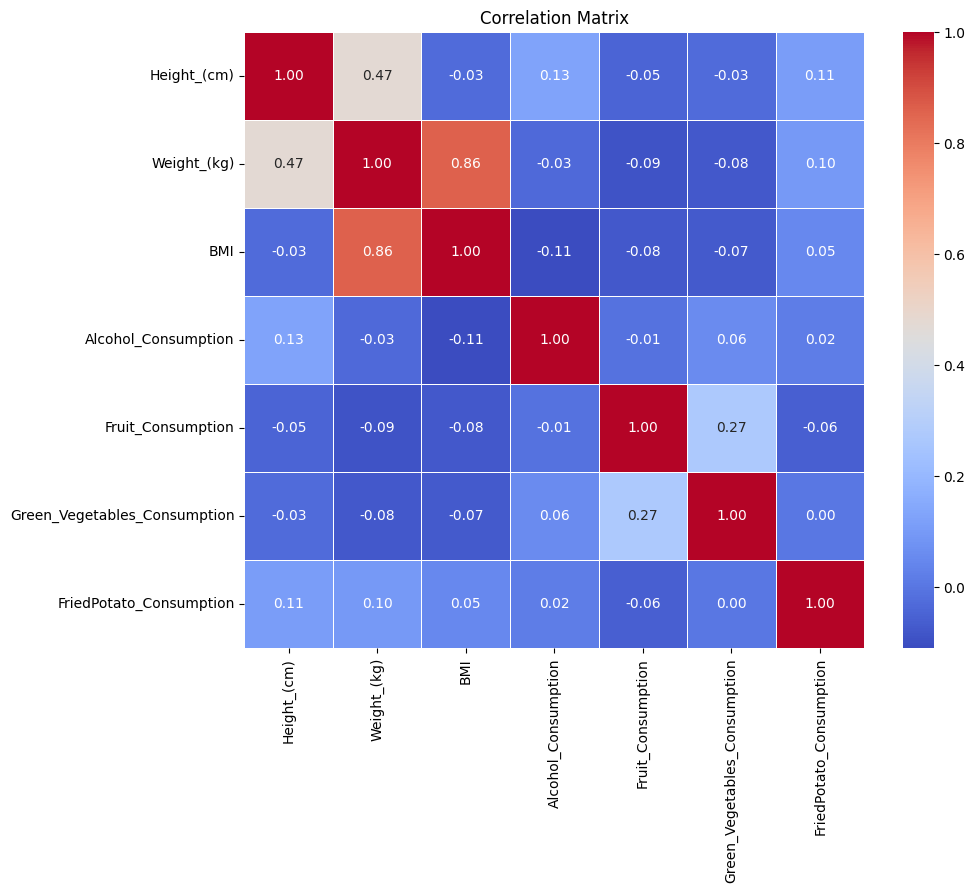

In [ ]:
# Se ejecuta la función getCorrelationMatrix para mostrar la matriz de correlación del dataframe
print("12. Correlation Matrix:")
eda.getCorrelationMatrix()

# Limpieza y Preprocesamiento de Datos

De cara al preprocesamiento de los datos y la evaluación, nos apoyaremos en la librería Data Science Workflows (DSWorkflows) creada en asignaturas anteriores. La librería está disponible en el siguiente [enlace](https://github.com/gmolinsm/DSWorkflows.git).


In [ ]:
!rm -r DSWorkflows/

rm: cannot remove 'DSWorkflows/': No such file or directory


In [ ]:
!git clone https://github.com/gmolinsm/DSWorkflows.git

Cloning into 'DSWorkflows'...
remote: Enumerating objects: 74, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 74 (delta 34), reused 61 (delta 21), pack-reused 0
Receiving objects: 100% (74/74), 12.47 KiB | 12.47 MiB/s, done.
Resolving deltas: 100% (34/34), done.


In [ ]:
!cd DSWorkflows/ && pip install .

Processing /content/DSWorkflows
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.7 MB/s eta 0:00:00
  Created wheel for DSWorkflows: filename=DSWorkflows-0.0.4-py3-none-any.whl size=5202 sha256=41299680d3792d2e251a888b21ddb7641d336fb7a8021c237190f589b52076d6
  Stored in directory: /tmp/pip-ephem-wheel-cache-5dl8rgsh/wheels/a1/79/3f/614d26f848136eeb1a8a89d4339027c2ea31fc527d124520ca
Successfully built DSWorkflows


Como primer paso, creamos un workflow para hacer la separación de características y variable objetivo.

In [ ]:
from DSWorkflows import Workflow

w = Workflow(dataframe=data, target_name='Heart_Disease')
X, y = w.get_X_and_y(remove_duplicates=True)

<Axes: >

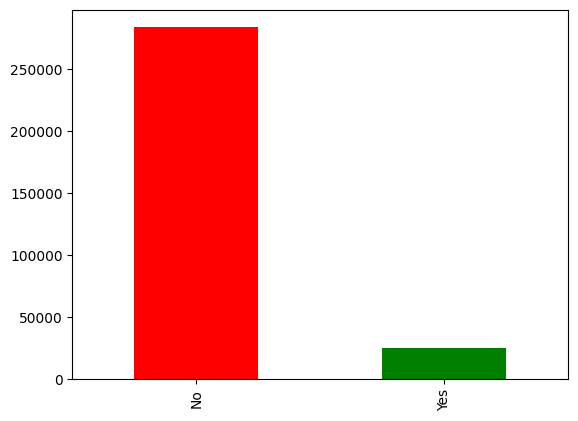

In [ ]:
y.value_counts().plot.bar(color=['r','g'])

Como se puede apreciar, la variable objetivo se encuentra desbalanceada. Esto podría afectar a nuestros resultados (en específico las métricas de accuracy). Dado que poseemos mas de 24 mil muestras de la clase minoritaria, podemos aplicar la técnica de undersampling con seguridad de que tendremos suficientes datos para que nuestros modelos convergan adecuadamente. Para esto, nuestra librería hace uso de la clase [RandomUnderSampler](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html) de Imbalanced Learn.

In [ ]:
X_under, y_under = w.undersample_data(X, y)

<Axes: >

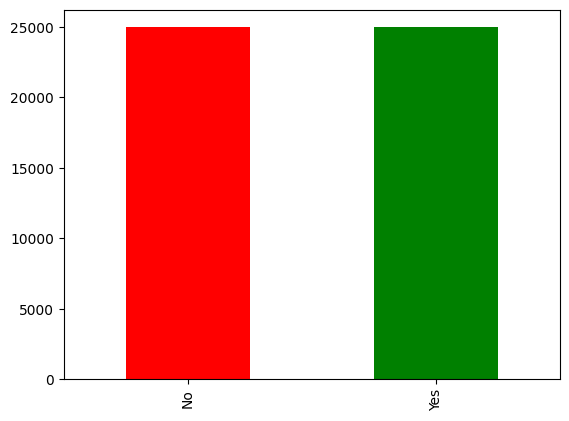

In [ ]:
y_under.value_counts().plot.bar(color=['r','g'])

Finalmente, transformamos las etiquetas de la variable objetivo a un formato adecuado para una matriz de confusión.

In [ ]:
from sklearn.preprocessing import LabelEncoder

y_encoded = LabelEncoder().fit_transform(y_under)
y_encoded

array([0, 0, 0, ..., 1, 1, 1])

# Selección de Características

La selección de características nos permite estudiar cuales de las variables del conjunto de predictores tienen una mayor relación con la variable objetivo, permite reducir la dimensionalidad del conjunto de datos al elegir el subconjunto de características que se consideran más importantes para el modelo.

Para este propósito se utilizará el algoritmo SelectKBest, esta técnica de selección de características asigna puntuaciones a cada característica y selecciona las k características con las puntuaciones más altas en base a cuales resultan más informativas al predecir la variable objetivo.

Para las variables numéricas se utilizará el algoritmo f_classif que calcula la relación entre cada característica y la variable objetivo utilizando el análisis de varianza. Cuanto mayor sea la puntuación, más informativa se considera la característica para predecir la variable objetivo en un problema de clasificación.

Para las variables numéricas se utilizará la prueba de independencia chi-cuadrado que mide la independencia entre las características y la variable objetivo. Una puntuación alta indica una relación significativa entre la característica y la variable objetivo.

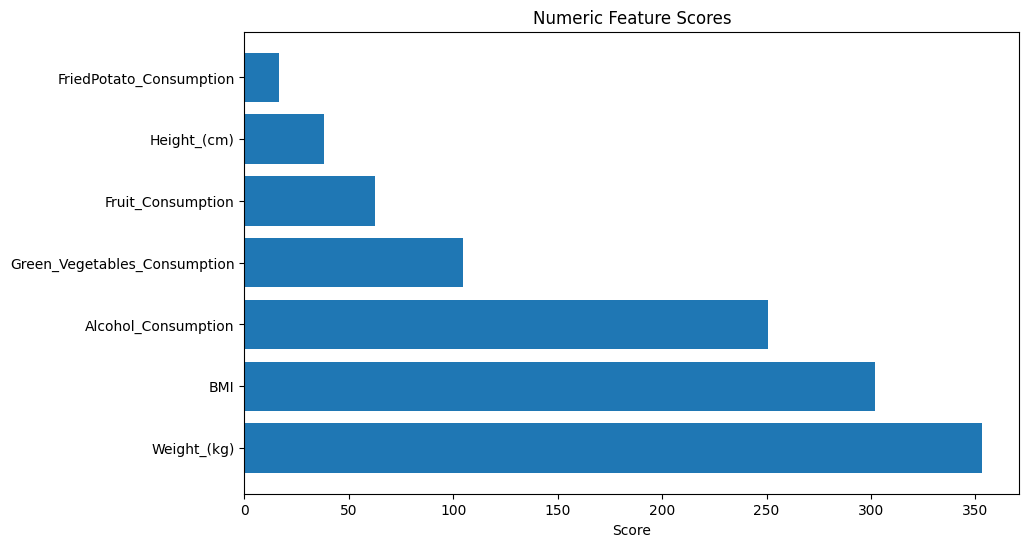

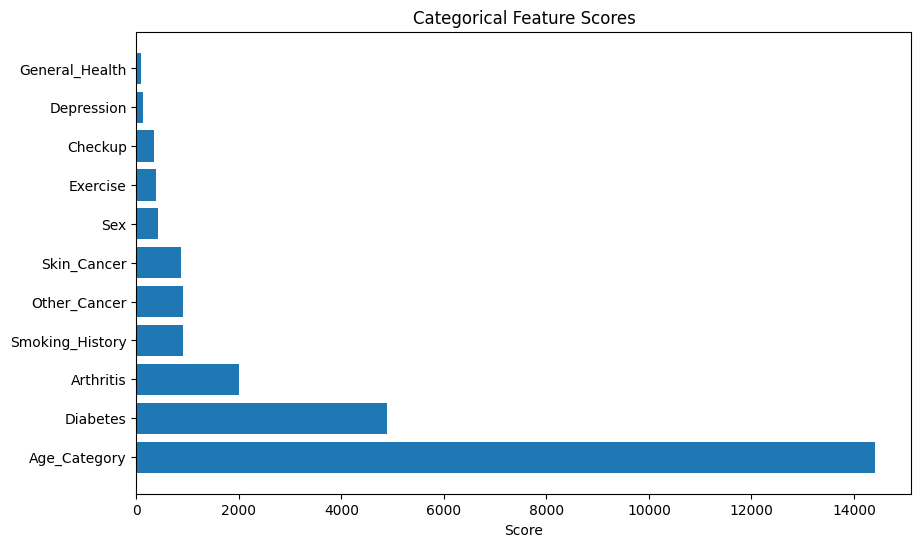

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
import matplotlib.pyplot as plt

# Se define la variable X_selection para que los cambios aplicados en el proceso de selección de características
# no afecten al conjunto de predictores que será utilizado para el entrenamiento y evaluación del modelo
X_selection = X_under

# Se separan las columnas numéricas y categóricas
num_cols = X_selection.select_dtypes(include=['float64']).columns
cat_cols = X_selection.select_dtypes(include=['object']).columns

# Se crea el preprocesador aplicando las técnicas de estandarización y codificación oportunas
# Se utiliza el algoritmo SelectKBest para realizar la selección de características
preprocessor = ColumnTransformer(transformers=[
    ('Numeric Columns', Pipeline([
        ('scaler', StandardScaler()),
        ('selector', SelectKBest(score_func=f_classif, k='all'))
    ]), num_cols),
    ('Categorical Columns', Pipeline([
        ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
        ('selector', SelectKBest(score_func=chi2, k='all'))
    ]), cat_cols)
])

# Se aplica el preprocesamiento y selección de características
X_processed = preprocessor.fit_transform(X_selection, y_encoded)

# Se obtienen las puntuaciones de las variables
feature_scores_num = preprocessor.named_transformers_['Numeric Columns']['selector'].scores_
feature_scores_cat = preprocessor.named_transformers_['Categorical Columns']['selector'].scores_

# Se crean DataFrames con las características y sus puntuaciones
feature_scores_df_num = pd.DataFrame({'Feature': num_cols, 'Score': feature_scores_num})
feature_scores_df_cat = pd.DataFrame({'Feature': cat_cols, 'Score': feature_scores_cat})

# Se ordenan los DataFrames por puntuación
feature_scores_df_num = feature_scores_df_num.sort_values(by='Score', ascending=False)
feature_scores_df_cat = feature_scores_df_cat.sort_values(by='Score', ascending=False)

# Se visualizan las puntuaciones de las características numéricas mediante un gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(feature_scores_df_num['Feature'], feature_scores_df_num['Score'])
plt.xlabel('Score')
plt.title('Numeric Feature Scores')
plt.show()

# Visualizar las puntuaciones de las características categóricas mediante un gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(feature_scores_df_cat['Feature'], feature_scores_df_cat['Score'])
plt.xlabel('Score')
plt.title('Categorical Feature Scores')
plt.show()

Como podemos comprobar, las variables más determinantes para predecir una posible enfermedad cardiovascular (Heart_Disease=1) son la edad y el peso. Tratándose de un set de características con una dimensionalidad no muy alta, no preveemos ninguna mejora en el rendimiento del modelo suprimiendo las características con menor score.

# Selección de Algoritmos

A continuación definimos una serie de pipelines donde aplicaremos un preprocesado a nuestros datos. En el caso de las variables numéricas haremos un reescalado mediante [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). En el caso de las variables categóricas aplicaremos [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html), debido a que entre los distintos valores que toman las variables categóricas se da un orden de ordinalidad, a excepción de aquellas que son binarias, pero para las cuales la elección de la técnica de codificación resulta más trivial. Además, cada pipeline cuenta con un clasificador distinto para contrastar el rendimiento.

Respecto a los algoritmos de aprendizaje supervisado que se compararán, dado que se trata de un problema de clasificación binaria, se han elegido los siguientes algoritmos:

* GaussianNB: este clasificador de Naive Bayes asume independencia condicional entre las características y utiliza la distribución normal (Gaussiana) para modelar la probabilidad de pertenencia a una clase. Es adecuado para conjuntos de datos grandes con características independientes.
* KNeighborsClassifier: clasificador basado en k vecinos más cercanos, asigna una etiqueta a un punto de datos según la mayoría de las etiquetas de sus vecinos más cercanos. Útil para datos con estructuras no lineales y cuando la localidad en la distribución de datos es importante.
* LinearSVC: máquina de soporte vectorial (SVM) para clasificación lineal. Busca encontrar un hiperplano que maximice el margen entre clases. Ideal cuando se enfrenta a problemas de clasificación binaria y linealmente separables.
* RandomForestClassifier: ensamble de árboles de decisión que clasifica por votación de múltiples árboles. Bueno para conjuntos de datos grandes y complejos, con alta dimensionalidad y propenso a sobreajuste en árboles individuales.
* LogisticRegression: un modelo de regresión que utiliza la función logística para predecir probabilidades de pertenencia a una clase. Adecuado para problemas de clasificación binaria y cuando se necesita interpretabilidad en los resultados.


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_cols = X_under.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X_under.select_dtypes(include=['object']).columns

num_pipeline = Pipeline([
    #('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    #('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    #('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

preprocessor = ColumnTransformer([
    ('Numeric Columns', num_pipeline, num_cols),
    ('Categorical Columns', cat_pipeline, cat_cols)
])

model_pipelines = [
    Pipeline([
        ('preprocessor', preprocessor),
        ('Classifier', GaussianNB())
    ]),
    Pipeline([
        ('preprocessor', preprocessor),
        ('Classifier', KNeighborsClassifier())
    ]),
    Pipeline([
        ('preprocessor', preprocessor),
        ('Classifier', LinearSVC())
    ]),
    Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(n_jobs=-1))
    ]),
    Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=100000, solver='sag', n_jobs=-1))
    ])
]

# Entrenamiento de Modelos

A continuación, llamamos a la función evaluate de nuestro workflow. Esta realizará un crossvalidation para cada modelo y calculará las métricas de aquel que presente un score promedio más alto.

Pipeline 0: [0.7113124  0.7204808  0.71588341 0.71563948 0.71664286] Mean score: 0.7159917900503269 +/- 0.0029191657242183043 stdev
Pipeline 1: [0.71917759 0.72067621 0.71573741 0.7246209  0.71748674] Mean score: 0.7195397703633779 +/- 0.0030302926639137555 stdev
Pipeline 2: [0.73683488 0.74542323 0.73373598 0.74620191 0.7456832 ] Mean score: 0.7415758385844927 +/- 0.00523475880740082 stdev
Pipeline 3: [0.75265417 0.75402337 0.74566777 0.75513057 0.74789682] Mean score: 0.751074538537177 +/- 0.003659872270782519 stdev
Pipeline 4: [0.73557947 0.74634714 0.7339474  0.74742533 0.74740789] Mean score: 0.7421414456266836 +/- 0.00605879033115809 stdev

Printing results for pipeline 3:
Accuracy: 0.750325357893683
Precission: 0.7319164802386279
Recall: 0.7880369329586512
F1 score: 0.7589406533926154


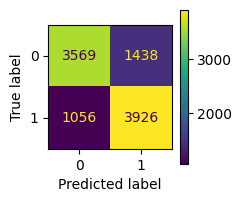

In [ ]:
w.evaluate(pipelines=model_pipelines, X=X_under, y=y_encoded, test_type='f1_weighted')

En este caso, podemos observar que obtenemos el mejor rendimiento mediante el [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). Utilizaremos [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) para tratar de optimizar este clasificador al máximo.

In [ ]:
# Primero, hacemos un split de train/test al 20%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_under, y_encoded, test_size = 0.2)

# A continuación, transformamos nuestro espacio de características
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.fit_transform(X_test)


NOTA: Debemos hacer la transformación después del split de train/test para evitar la fuga de información (data leakage)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definimos unos valores tipo para el modelo de RandomForest
parameters = {
    'n_estimators': [10, 50, 100, 200],
    'criterion': ['gini','entropy','log_loss'],
    'max_depth': [2, 4, 8, None],
    'n_jobs': [-1]
}

rfc = RandomForestClassifier()
clf = GridSearchCV(rfc, parameters)

clf.fit(X_train_transformed, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 8, None],
                         'n_estimators': [10, 50, 100, 200], 'n_jobs': [-1]})

In [ ]:
# Mostramos los mejores parámetros encontrados
clf.best_params_

{'criterion': 'gini', 'max_depth': 8, 'n_estimators': 200, 'n_jobs': -1}

Reevaluamos el nuestro modelo con los mejores hiperparámetros encontrados.

In [ ]:
model_pipelines = [
    Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(**clf.best_params_))
    ])
]

Pipeline 0: [0.75362692 0.76241029 0.75323358 0.75982684 0.75383198] Mean score: 0.7565859204529481 +/- 0.003794862422045587 stdev

Printing results for pipeline 0:
Accuracy: 0.7580338372209431
Precission: 0.7294685990338164
Recall: 0.8183460457647531
F1 score: 0.7713555954971147


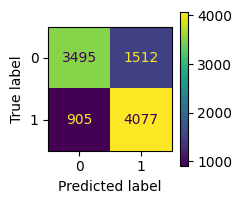

In [ ]:
w.evaluate(pipelines=model_pipelines, X=X_under, y=y_encoded, test_type='f1_weighted')

Como se puede comprobar, el incremento en el rendimiento no es muy significativo.

# Evaluación de Modelos

A continuación, trataremos de contrastar el rendimiento de nuestro modelo con otros estimadores.

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train_transformed, y_train)
gnb_pred_proba = gnb.predict_proba(X_test_transformed)[::, 1]

In [ ]:
knc = KNeighborsClassifier()
knc.fit(X_train_transformed, y_train)
knc_pred_proba = knc.predict_proba(X_test_transformed)[::, 1]

In [ ]:
lrc = LogisticRegression(max_iter=100000, solver='sag', n_jobs=-1)
lrc.fit(X_train_transformed, y_train)
lrc_pred_proba = lrc.predict_proba(X_test_transformed)[::, 1]

In [ ]:
# Random Forest con los parámetros optimizados
clf_pred_proba = clf.predict_proba(X_test_transformed)[::, 1]
clf_pred_proba

array([0.61646745, 0.77360951, 0.86579592, ..., 0.39250094, 0.77765976,
       0.58636642])

Calculamos el ratio de falsos positivos, falsos negativos y el área bajo la curva para el Random Forest y los otros modelos que nos servirán como benchmark. No incluimos LinearSCV ya que este no implementa el método predict_proba().

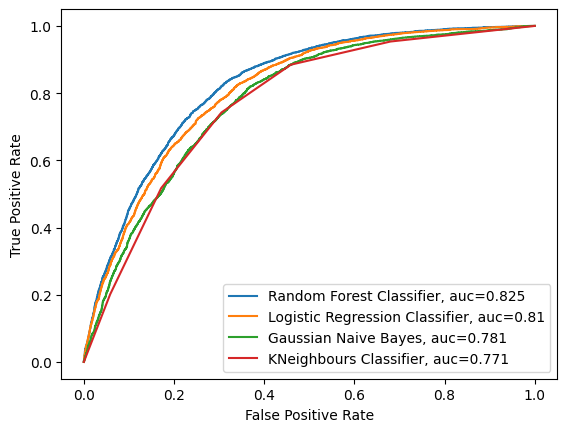

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

fpr1, tpr1, _ = roc_curve(y_test,  clf_pred_proba)
auc1 = round(roc_auc_score(y_test, clf_pred_proba), 3)

fpr2, tpr2, _ = roc_curve(y_test,  lrc_pred_proba)
auc2 = round(roc_auc_score(y_test, lrc_pred_proba), 3)

fpr3, tpr3, _ = roc_curve(y_test,  gnb_pred_proba)
auc3 = round(roc_auc_score(y_test, gnb_pred_proba), 3)

fpr4, tpr4, _ = roc_curve(y_test,  knc_pred_proba)
auc4 = round(roc_auc_score(y_test, knc_pred_proba), 3)

plt.plot(fpr1,tpr1,label="Random Forest Classifier, auc="+str(auc1))
plt.plot(fpr2,tpr2,label="Logistic Regression Classifier, auc="+str(auc2))
plt.plot(fpr3,tpr3,label="Gaussian Naive Bayes, auc="+str(auc3))
plt.plot(fpr4,tpr4,label="KNeighbours Classifier, auc="+str(auc4))
plt.legend(loc=4)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Como comprobamos anteriormente, obtenemos el mejor resultado mediante Random Forest Classifier.

# Presentación de Resultados

Para su posterior utilización, serializamos nuestro modelo utilizando la librería joblib.

In [ ]:
import joblib
joblib.dump(w.best_pipeline, "model.pkl")

['model.pkl']

In [ ]:
model = joblib.load("model.pkl")
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Numeric Columns',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption',
       'Fruit_Consumption', 'Green_Vegetables_Consumption',
       'FriedPotato_Consumption'],
      dtype='object')),
                                                 ('Categorical Columns',
                                                  Pipeline(steps=[('encoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  Index(['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer',
       'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category',
       'Smoking_History'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(max_depth=8, n_estimators=200,
                                        n_jobs=-1))])

Hemos creado un pequeño formulario en VueJS que permite al usuario final hacer uso del modelo y obtener predicciones: https://gmolinsm.github.io/CardioDiseaseFront/. El código se puede consultar en los siguientes enlaces:


*   Frontend del formulario: https://github.com/gmolinsm/CardioDiseaseFront.git
*   Backend del formulario: https://github.com/gmolinsm/CardioDiseaseBack.git



# Discusión y Conclusiones

## Discusión

En el presente trabajo se ha planteado la creación de un modelo de aprendizaje supervisado para la predicción de enfermedades cardiovasculares en base a distintos parámetros recogidos en el dataset "Cardiovascular Diseases Risk Prediction Dataset" que se puede encontrar en Kaggle.

Se ha realizado un estudio inicial sobre la información y estructura del dataset mediante distintas estadísticas y gráficas, de cara a un posterior proceso de limpieza y preprocesamiento en el cual se ha abordado el desbalance de la variable objetivo.

El siguiente paso fue el estudio de la selección de características, que tras evaluar la eliminación de aquellas con menor importancia se advirtió que no se obtienen mejoras significativas en el rendimiento, debido a la baja dimensionalidad del conjunto de datos.

A continuación, se abordó el entrenamiento de diversos modelos mediante los siguientes algoritmos de aprendizaje supervisado: GaussianNB, KNeighborsClassifier,  LinearSVC, RandomForestClassifier y LogisticRegression, para ello se utilizó un proceso de cross validation y entre los cuales destacó el uso de RandomForest.

Partiendo de este punto se obtuvieron los hiperparámetros optimizados del algoritmo mediante Grid Search, aunque este aspecto no supuso una mejora significativa de los resultados del modelo, estos fueron los resultados finales obtenidos:
* F1 score balanceado: 0.756 +/- 0.004
* Accuracy: 0.7580338372209431
* Precission: 0.7294685990338164
* Recall: 0.8183460457647531
* F1 score: 0.7713555954971147

Respecto a la matriz de confusión se obtuvieron los siguientes datos:
* True positive: 3495 (35%)
* False positive: 905 (9%)
* True negative: 4077 (41%)
* False negative: 1512 (15%)

Finalmente se graficó al área bajo la curva obtenida de cada algoritmo en comparación a RandomForest con sus parámetros optimizados, volviendo a demostrar su superioridad, con un valor de 0.825.

## Posibles mejoras

Con el objetivo de no aumentar la complejidad de este trabajo se decidió optar por el uso de un único clasificador para el modelo, sin embargo una posible mejora que se podría implementer sería la del uso de ensamblado de clasificadores, tales como Stacking, Bagging o Boosting, que nos permitirían obtener una clasificación basada en el resultado de diversos algoritmos.

Otra opción interesante sería el uso de técnicas de aprendizaje profundo como redes neuronales para obtener un acercamiento distinto al del aprendizaje supervisado de cara a obtener la predicción.

## Reflexiones

Los pasos que se han seguido en este trabajo nos han permitido obtener una mayor claridad sobre el proceso necesario para la generación de modelos de aprendizaje supervisado.

El análisis exploratorio de datos nos permitió comprender mejor la estructura y particularidades del dataset, mientras que el entrenamiento y evaluación del modelo nos han ayudado a realizar un primer acercamiento a los algoritmos de aprendizaje supervisado, así como su optimización y visualización de resultados.

Pese a los modestos resultados obtenidos en nuestro modelo, estamos satisfechos de todo lo que hemos aprendido en su construcción y de los conocimientos adquiridos en materia de aprendizaje superivisado.










